<a href="https://colab.research.google.com/github/Dannyhamtar/MachineLearning/blob/main/Task%20week%2011/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Danny Hamtar Pangestu

NIM: 1103210037

Lecture : 11

Model: LeNet

Dokumentasi GPT : [link](https://chatgpt.com/share/273896aa-a78d-404d-8f81-128d346443ee)

**LeNet-5 adalah jaringan saraf convolutional yang sangat efisien untuk pengenalan karakter tulisan tangan.
Jaringan syaraf tiruan convolutional dapat memanfaatkan informasi struktural gambar dengan baik.
Lapisan konvolusional memiliki lebih sedikit parameter, yang juga ditentukan oleh karakteristik utama lapisan konvolusional, yaitu koneksi lokal dan bobot bersama.**

### Code Implementation

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Image Data Preprocessing

In [4]:
# Menjalankan Operasi Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalisasi
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### LeNet Model Architecture

In [5]:
# Membangun Arsitektur Model
model = Sequential()

# Menambahkan layer konvolusi pertama
# Pilih 6 kernel konvolusi dengan ukuran 5 * 5 (tanpa pergeseran), dan dapatkan 6 peta fitur.
# Ukuran setiap peta fitur adalah 32−5 + 1 = 28.
# Artinya, jumlah neuron telah dikurangi dari 1024 menjadi 28 * 28 = 784.
# Parameter antara layer input dan layer C1: 6 * (5 * 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Input dari layer ini adalah output dari layer pertama, yang merupakan matriks node 28 * 28 * 6.
# Ukuran filter yang digunakan dalam layer ini adalah 2 * 2, dan panjang langkah dan lebar keduanya adalah 2, sehingga ukuran matriks output dari layer ini adalah 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ukuran matriks input dari layer ini adalah 14 * 14 * 6, ukuran filter yang digunakan adalah 5 * 5, dan kedalaman adalah 16.
# Layer ini tidak menggunakan padding 0 penuh, dan langkahnya adalah 1.
# Ukuran matriks output dari layer ini adalah 10 * 10 * 16.
# Layer ini memiliki 5 * 5 * 6 * 16 + 16 = 2416 parameter.
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# Ukuran matriks input dari layer ini adalah 10 * 10 * 16. Ukuran filter yang digunakan dalam layer ini adalah 2 * 2, dan langkah panjang dan lebarnya keduanya adalah 2,
# sehingga ukuran matriks output dari layer ini adalah 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ukuran matriks input dari layer ini adalah 5 * 5 * 16. Layer ini disebut layer konvolusi dalam makalah LeNet-5, tetapi karena ukuran filternya adalah 5 * 5,
# sehingga tidak berbeda dengan layer yang sepenuhnya terhubung.
# Jika node-node dalam matriks 5 * 5 * 16 ditarik menjadi vektor, maka layer ini sama dengan layer yang sepenuhnya terhubung.
# Jumlah node output dalam layer ini adalah 120, dengan total parameter 5 * 5 * 16 * 120 + 120 = 48120.
model.add(Flatten())
model.add(Dense(120, activation='relu'))

# Jumlah node input dalam layer ini adalah 120 dan jumlah node outputnya adalah 84. Total parameter adalah 120 * 84 + 84 = 10164 (w + b).
model.add(Dense(84, activation='relu'))

# Jumlah node input dalam layer ini adalah 84 dan jumlah node outputnya adalah 10. Total parameter adalah 84 * 10 + 10 = 850.
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(x_train, y_train, batch_size=360, epochs=20, verbose=1, validation_data=(x_test, y_test))



Epoch 1/20
167/167 [==============================] - 20s 113ms/step - loss: 0.5386 - accuracy: 0.8477 - val_loss: 0.1711 - val_accuracy: 0.9487
Epoch 2/20
167/167 [==============================] - 20s 117ms/step - loss: 0.1497 - accuracy: 0.9546 - val_loss: 0.0984 - val_accuracy: 0.9706
Epoch 3/20
167/167 [==============================] - 18s 111ms/step - loss: 0.0968 - accuracy: 0.9697 - val_loss: 0.0721 - val_accuracy: 0.9777
Epoch 4/20
167/167 [==============================] - 20s 122ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.0613 - val_accuracy: 0.9797
Epoch 5/20
167/167 [==============================] - 21s 125ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 6/20
167/167 [==============================] - 25s 150ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0532 - val_accuracy: 0.9822
Epoch 7/20
167/167 [==============================] - 19s 111ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0439 - val_ac

#Evaluasi Model


In [16]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9882
Test Loss: 0.041755933314561844
Test accuracy: 0.9882000088691711


In [17]:
# Total data training
total_train_data = len(x_train)
# Total data testing
total_test_data = len(x_test)

print("Total data in training set:", total_train_data)
print("Total data in testing set:", total_test_data)

Total data in training set: 60000
Total data in testing set: 10000


In [18]:
# Predictions on training data
train_predictions = model.predict(x_train)
train_correct = sum([1 for i in range(len(train_predictions)) if np.argmax(train_predictions[i]) == np.argmax(y_train[i])])

# Predictions on testing data
test_predictions = model.predict(x_test)
test_correct = sum([1 for i in range(len(test_predictions)) if np.argmax(test_predictions[i]) == np.argmax(y_test[i])])

print("Total correct predictions on training data:", train_correct)
print("Total correct predictions on testing data:", test_correct)

313/313 [==============================] - 2s 6ms/step
Total correct predictions on training data: 59834
Total correct predictions on testing data: 9882


#Visualisasi Model

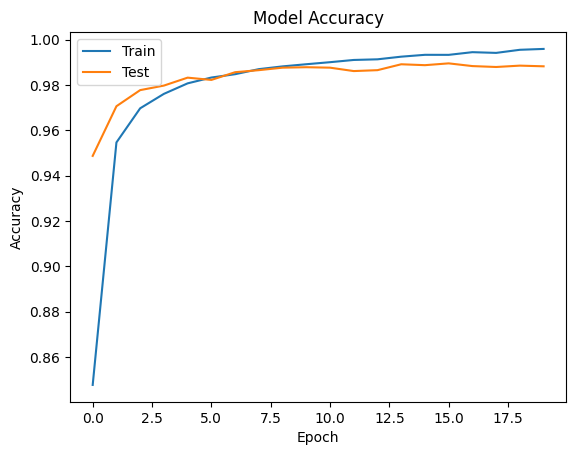

In [20]:
# Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

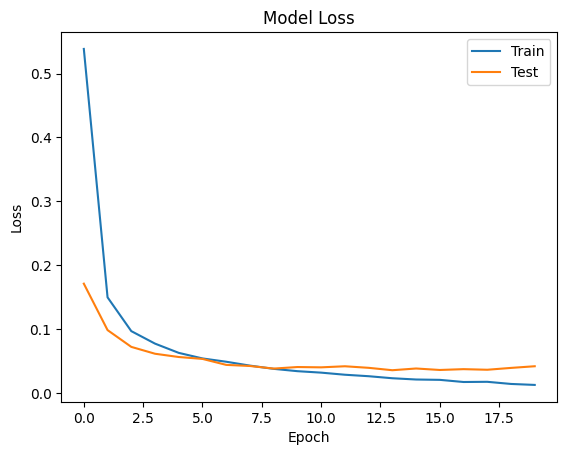

In [22]:
# Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()